In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [ ]:
# Load the Iris dataset
iris = load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Convert data to a Pandas DataFrame
#np.c_[iris['data'], iris['target']] concatenates these two arrays column-wise.
#It takes each row of the 'data' array and appends the corresponding target label from the 'target' array.
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Adding nominal feature.
#pd.Categorical.from_codes() is a Pandas function that creates a categorical variable from codes and categories.
#In this case, it takes the numerical labels (iris.target) and assigns the corresponding names (iris.target_names).
data['nominal_feature'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,nominal_feature
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
# Encode nominal features to numeric
label_encoder = LabelEncoder()
data['nominal_feature_encoded'] = label_encoder.fit_transform(data['nominal_feature'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,nominal_feature,nominal_feature_encoded
0,5.1,3.5,1.4,0.2,0.0,setosa,0
1,4.9,3.0,1.4,0.2,0.0,setosa,0
2,4.7,3.2,1.3,0.2,0.0,setosa,0
3,4.6,3.1,1.5,0.2,0.0,setosa,0
4,5.0,3.6,1.4,0.2,0.0,setosa,0


In [ ]:
# Introducing missing values for demonstration
data.loc[::5, 'petal length (cm)'] = np.nan #selects every 5th row in the 'petal length' column of the DataFrame data and sets the values in those rows to NaN.
data.loc[::10, 'petal width (cm)'] = np.nan
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,nominal_feature,nominal_feature_encoded
0,5.1,3.5,NaN,NaN,0.0,setosa,0
1,4.9,3.0,1.4,0.2,0.0,setosa,0
2,4.7,3.2,1.3,0.2,0.0,setosa,0
3,4.6,3.1,1.5,0.2,0.0,setosa,0
4,5.0,3.6,1.4,0.2,0.0,setosa,0
5,5.4,3.9,NaN,0.4,0.0,setosa,0
6,4.6,3.4,1.4,0.3,0.0,setosa,0
7,5.0,3.4,1.5,0.2,0.0,setosa,0
8,4.4,2.9,1.4,0.2,0.0,setosa,0
9,4.9,3.1,1.5,0.1,0.0,setosa,0


In [ ]:
# Finding columns with missing values
cols_with_missing = data.columns[data.isnull().any()]

# Replace missing values with column means
for col in cols_with_missing:
    col_mean = data[col].mean()
    data[col].fillna(col_mean, inplace=True)

# Create a new DataFrame after filling missing values
data_imputed = data.copy()
data_imputed.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,nominal_feature,nominal_feature_encoded
0,5.1,3.5,3.7325,1.194074,0.0,setosa,0
1,4.9,3.0,1.4000,0.200000,0.0,setosa,0
2,4.7,3.2,1.3000,0.200000,0.0,setosa,0
3,4.6,3.1,1.5000,0.200000,0.0,setosa,0
4,5.0,3.6,1.4000,0.200000,0.0,setosa,0


In [ ]:
# Split data into features and target variable
X = data_imputed.drop(['nominal_feature', 'target', 'nominal_feature_encoded'], axis=1)
y = data_imputed['target']
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5             3.7325          1.194074
1                  4.9               3.0             1.4000          0.200000
2                  4.7               3.2             1.3000          0.200000
3                  4.6               3.1             1.5000          0.200000
4                  5.0               3.6             1.4000          0.200000
..                 ...               ...                ...               ...
145                6.7               3.0             3.7325          2.300000
146                6.3               2.5             5.0000          1.900000
147                6.5               3.0             5.2000          2.000000
148                6.2               3.4             5.4000          2.300000
149                5.9               3.0             5.1000          1.800000

[150 rows x 4 columns]


## Feature Scaling

In [ ]:
X1=X.values
type(X1)

numpy.ndarray

In [ ]:


X_new=(X1[:,0]-min(X1[:,0]))/(max(X1[:,0])-min(X1[:,0]))
print(X_new)

[0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
 0.08333333 0.19444444 0.02777778 0.16666667 0.30555556 0.13888889
 0.13888889 0.         0.41666667 0.38888889 0.30555556 0.22222222
 0.38888889 0.22222222 0.30555556 0.22222222 0.08333333 0.22222222
 0.13888889 0.19444444 0.19444444 0.25       0.25       0.11111111
 0.13888889 0.30555556 0.25       0.33333333 0.16666667 0.19444444
 0.33333333 0.16666667 0.02777778 0.22222222 0.19444444 0.05555556
 0.02777778 0.19444444 0.22222222 0.13888889 0.22222222 0.08333333
 0.27777778 0.19444444 0.75       0.58333333 0.72222222 0.33333333
 0.61111111 0.38888889 0.55555556 0.16666667 0.63888889 0.25
 0.19444444 0.44444444 0.47222222 0.5        0.36111111 0.66666667
 0.36111111 0.41666667 0.52777778 0.36111111 0.44444444 0.5
 0.55555556 0.5        0.58333333 0.63888889 0.69444444 0.66666667
 0.47222222 0.38888889 0.33333333 0.33333333 0.41666667 0.47222222
 0.30555556 0.47222222 0.66666667 0.55555556 0.36111111 0.33333333
 0.33333

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Min-Max Scaling also known as normalization, is to transform features by scaling them to a specific range, usually between 0 and 1.
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)
print("Min-Max Scaled Data:\n", X_min_max_scaled[:5])  # Displaying first 5 rows

Min-Max Scaled Data:
 [[0.22222222 0.625      0.46313559 0.4558642 ]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [ ]:
# Standardization (Z-score Scaling)
#StandardScaler transforms the data such that its distribution will have a mean value of 0
#and a standard deviation of 1.

#It ensures that each feature is centered at zero and has a unit standard deviation.
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
print("\nStandard Scaled Data:\n", X_standard_scaled[:5])  # Displaying first 5 rows


Standard Scaled Data:
 [[-9.00681170e-01  1.01900435e+00 -2.84507680e-16  0.00000000e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.49432625e+00 -1.39806959e+00]
 [-1.38535265e+00  3.28414053e-01 -1.55839169e+00 -1.39806959e+00]
 [-1.50652052e+00  9.82172869e-02 -1.43026082e+00 -1.39806959e+00]
 [-1.02184904e+00  1.24920112e+00 -1.49432625e+00 -1.39806959e+00]]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Perform n-fold cross-validation
n_folds = 5
cross_val_scores = cross_val_score(svm_classifier, X_standard_scaled, y, cv=n_folds)

print(f"{n_folds}-fold Cross Validation Scores: {cross_val_scores}")
print(f"Mean Accuracy: {np.mean(cross_val_scores)}")


5-fold Cross Validation Scores: [0.86666667 0.93333333 0.9        0.9        0.96666667]
Mean Accuracy: 0.9133333333333333


In [ ]:
# Predict using the trained model
y_pred = svm_classifier.predict(X_test)

# Confusion Matrix

summarizes the performance of a machine learning model on a set of test data.

**true positives (TP)**: occurs when the model accurately predicts a positive data point.

**true negatives (TN)**: occurs when the model accurately predicts a negative data point.

**false positives (FP)**: occurs when the model predicts a positive data point incorrectly.

**false negatives (FN**): occurs when the model predicts a negative data point incorrectly.

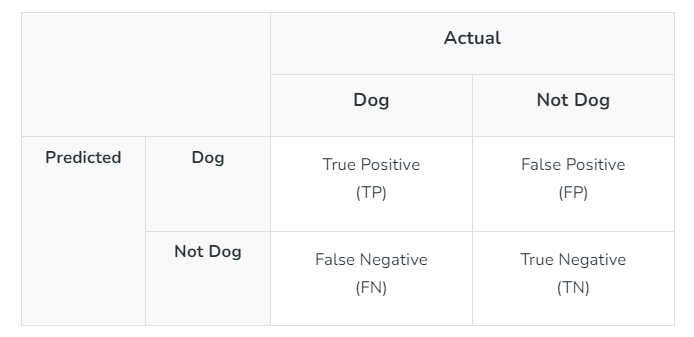

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


In [ ]:
# Classification report including precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Lab Exercise: Predicting House Prices**

**Objective**: Implement a ML model to predict house prices using the Boston Housing dataset.

**Task Description**:

You've been provided with the Boston Housing dataset containing various features related to housing in Boston, and the target variable is the median value of owner-occupied homes (in $1000s). Your task is to:

Load the dataset and split it into training and testing sets (80% training, 20% testing).

Train a ML model on the training data.

Evaluate the model's performance on the testing set using the following metrics:

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

R-squared (R2 Score)

Interpret and analyze the model's performance.